In [1]:
import pandas as pd #데이터 구성
import numpy as np #행렬 연산

import matplotlib.pyplot as plt #데이터 시각화
import matplotlib

import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
#데이터 경로는 본인의 데이터 파일 경로로 지정하셔야 합니다.
df_raw = pd.read_csv("/Users/wonho/Temp/Hustar_ICT심화트랙/dataset.csv",engine="python", encoding = "EUC-KR")
df_raw 

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조
5,PB562779,2008-08-01:00:02:06,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1143,127,1128,57,314,1128,874,적용,8,4조
6,PB562780,2008-08-01:00:02:28,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1138,126,1130,50,289,1130,878,적용,8,2조
7,PB562781,2008-08-01:00:02:21,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1139,126,1131,52,294,1131,870,적용,8,4조
8,PB562782,2008-08-01:00:02:51,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,2호기,...,1127,126,1122,52,293,1122,873,적용,8,1조
9,PB562783,2008-08-01:00:03:15,양품,COMMON,T8,38.43,3129,16187,15280,2호기,...,1135,119,1124,73,298,1124,881,적용,8,4조


In [51]:
#결측치 확인
df_raw.isnull().sum(axis=0)

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [52]:
# 변수 제거
df_raw.drop("PLATE_NO",axis=1,inplace=True)
df_raw.drop("ROLLING_DATE",axis=1,inplace=True)
df_raw.drop("SPEC",axis=1,inplace=True)
df_raw.head()

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,양품,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,양품,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,양품,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,양품,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조


In [53]:
df_raw["SCALE"] = np.where(df_raw["SCALE"]=="불량",1,0)
df_raw["HSB"] = np.where(df_raw["HSB"]=="적용",1,0)

In [54]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,32.25,3707,15109,14180,1,1144,116,1133,59,...,0,0,0,1,0,0,0,1,0,0
1,0,32.25,3707,15109,14180,2,1144,122,1135,53,...,0,0,0,1,0,0,0,1,0,0
2,0,33.27,3619,19181,18130,1,1129,116,1121,55,...,0,0,1,0,1,0,0,0,1,0
3,0,33.27,3619,19181,18130,2,1152,125,1127,68,...,0,0,1,0,1,0,0,0,1,0
4,0,38.33,3098,13334,12430,1,1140,134,1128,48,...,0,0,1,0,0,1,1,0,0,0


In [55]:
df_raw_y = df_raw_dummy["SCALE"] #목표 변수 설정
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False) #설명 변수 데이터 지정

In [56]:
#train_test_split : [train(0.7) : test(0.3)]
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

#train_test_split : [train(0.57) : valiation(0.43)]
df_train_x, df_valiation_x, df_train_y, df_valiation_y = train_test_split(df_train_x, df_train_y, test_size = 0.43, random_state = 1234)

#데이터 분할 [train(0.4) : valiation(0.3) : test(0.3)]
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("valiation data X size : {}".format(df_valiation_x.shape))
print("valiation data Y size : {}".format(df_valiation_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (287, 30)
train data Y size : (287,)
valiation data X size : (217, 30)
valiation data Y size : (217,)
test data X size : (216, 30)
test data Y size : (216,)


In [57]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_valiation_x, df_valiation_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.940


In [58]:
tree_uncustomized

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [59]:
v_feature_name = df_train_x.columns

In [60]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(1, 21)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_valiation_x, df_valiation_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [61]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.902,0.866
1,2,0.941,0.912
2,3,0.958,0.959
3,4,0.969,0.963
4,5,0.972,0.963
5,6,0.972,0.963
6,7,0.972,0.963
7,8,0.983,0.963
8,9,0.990,0.926
9,10,0.993,0.926


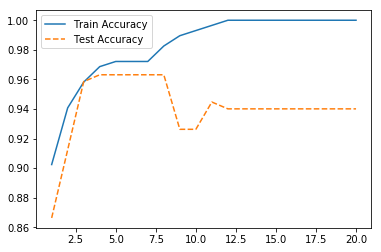

In [62]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [63]:
max_depth = 4

In [64]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 4, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_valiation_x, df_valiation_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [65]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.969,0.963
1,4,0.958,0.959
2,6,0.955,0.954
3,8,0.948,0.908
4,10,0.941,0.912
5,12,0.906,0.885
6,14,0.906,0.885
7,16,0.902,0.866
8,18,0.902,0.866
9,20,0.902,0.866


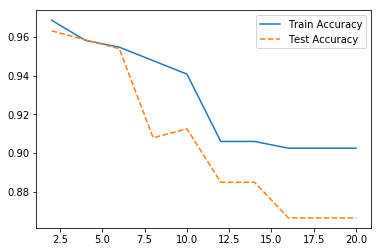

In [66]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [67]:
min_samples_leaf = 4

In [68]:
train_accuracy = []; test_accuracy = []

para_split = [n_split * 10 for n_split in range(1, 30)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, min_samples_leaf = 4, max_depth = 4, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_valiation_x, df_valiation_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [69]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.958,0.959
1,20,0.958,0.959
2,30,0.958,0.959
3,40,0.958,0.959
4,50,0.958,0.959
5,60,0.958,0.959
6,70,0.958,0.959
7,80,0.958,0.959
8,90,0.958,0.959
9,100,0.958,0.959


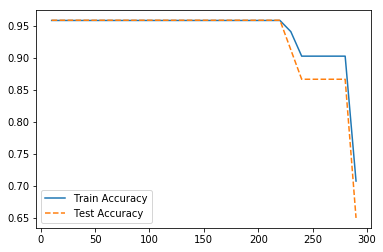

In [70]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [71]:
min_samples_split = 10

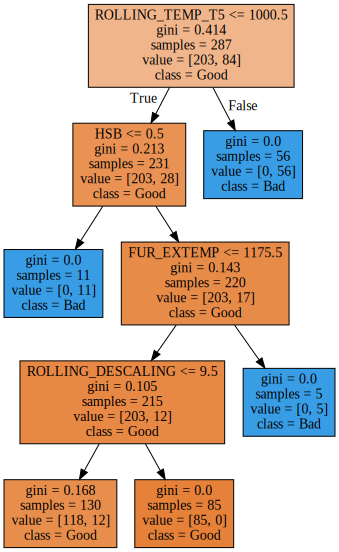

In [72]:
tree_low = DecisionTreeClassifier(random_state = 1234, max_depth = 4, min_samples_split = 10, min_samples_leaf = 4)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"], feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [73]:
tree_final = DecisionTreeClassifier(max_depth = 4, min_samples_split = 10, min_samples_leaf = 4, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

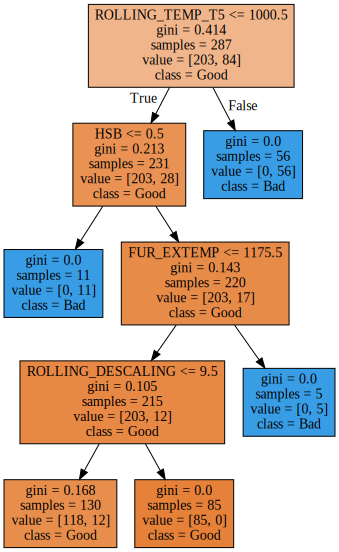

In [74]:
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [75]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n {}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.972

Confusion matrix: 
 [[145   0]
 [  6  65]]


In [76]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
11,ROLLING_TEMP_T5,0.717
12,HSB,0.184
10,FUR_EXTEMP,0.090
13,ROLLING_DESCALING,0.009
0,PT_THK,0.000
21,STEEL_KIND_T7,0.000
19,STEEL_KIND_T3,0.000
20,STEEL_KIND_T5,0.000
22,STEEL_KIND_T8,0.000
17,STEEL_KIND_T0,0.000


Text(0, 0.5, '설명변수')

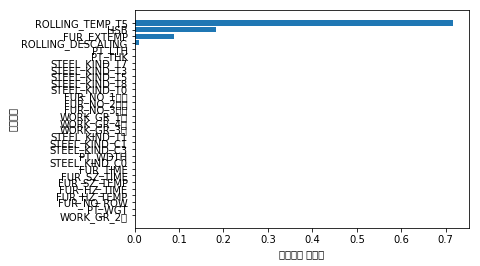

In [77]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")